In [1]:
# Fashion MNIST Data Classification Project
!pip install tensorflow

Traceback (most recent call last):
  File "C:\Users\Ramsha Khan\anaconda3\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [1]:
#1) Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
#2) Load data
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Print the shape of data
X_train.shape,y_train.shape,"*********", X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '*********', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels=[ "T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

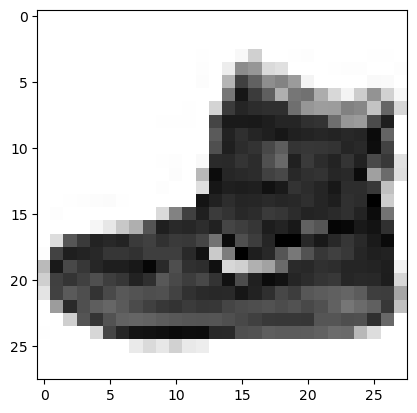

In [8]:
#show image
plt.imshow(X_train[0],cmap='Greys')

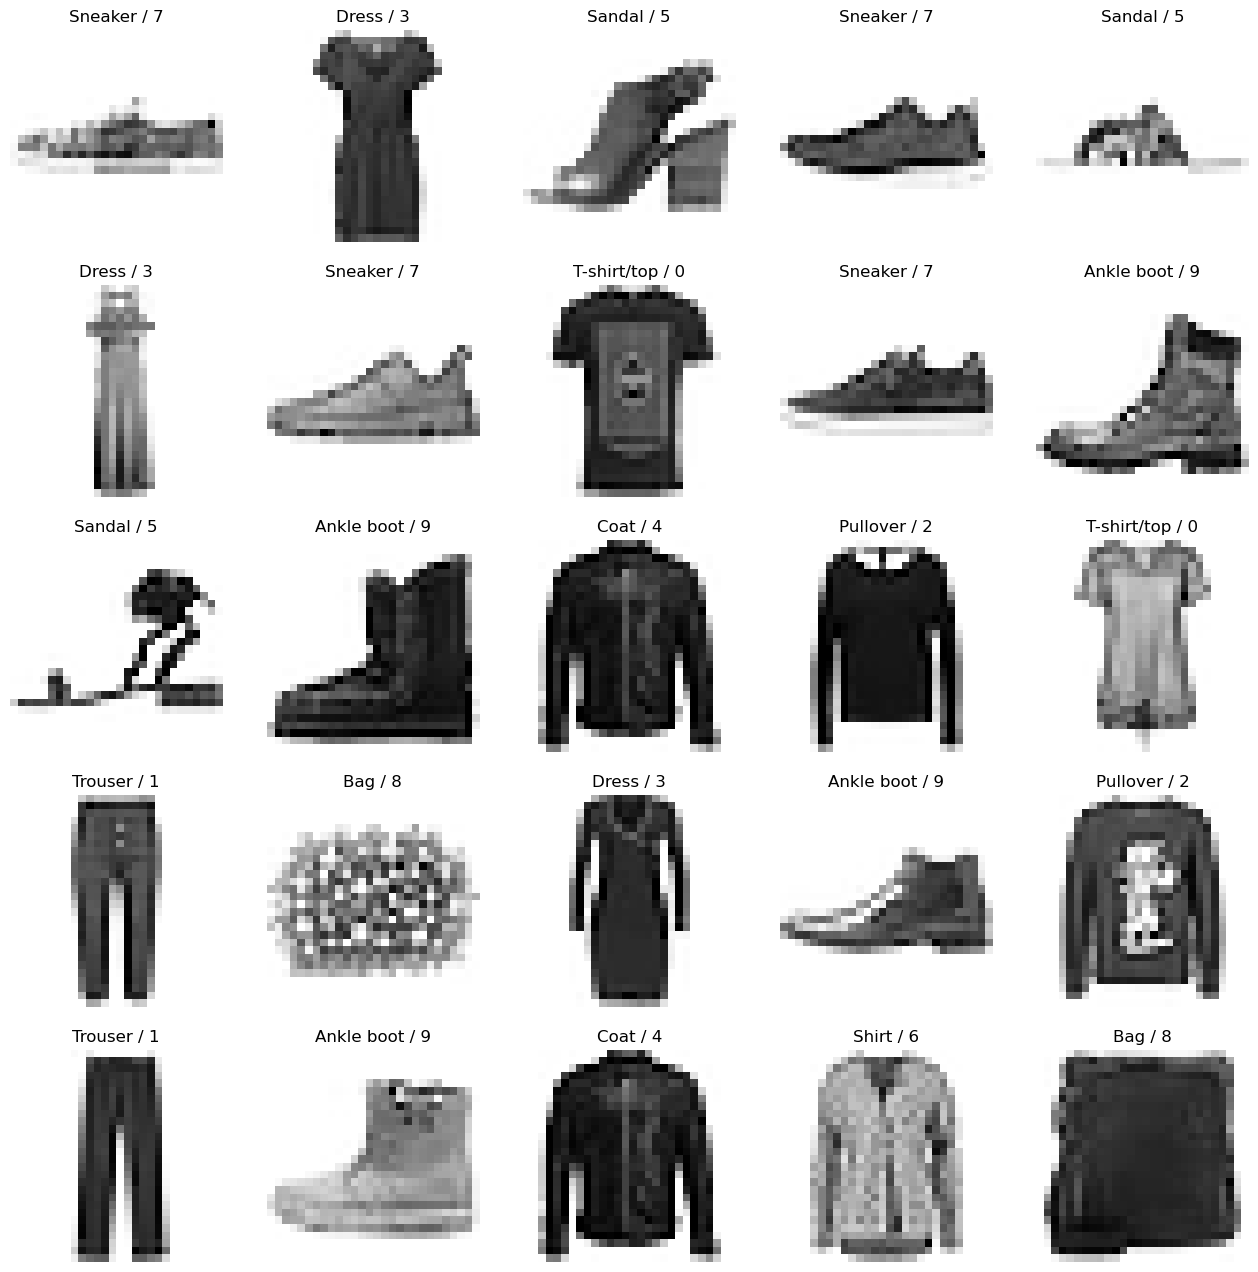

In [9]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train,-1)

In [12]:
X_train.ndim

4

In [13]:
X_test=np.expand_dims(X_test,-1)

In [14]:
# feature scaling
X_train =X_train/255
X_test=X_test/255

In [15]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [16]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [17]:
#3) Building the CNN model
model = keras.models.Sequential([keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),keras.layers.MaxPooling2D(pool_size=(2,2)),keras.layers.Flatten(),keras.layers.Dense(units=128,activation='relu'),keras.layers.Dense(units=10,activation='softmax')])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [21]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10


94/94 [==============================] - 10s 91ms/step - loss: 0.6458 - accuracy: 0.7853 - val_loss: 0.4198 - val_accuracy: 0.8522
Epoch 2/10
94/94 [==============================] - 8s 82ms/step - loss: 0.3741 - accuracy: 0.8694 - val_loss: 0.3504 - val_accuracy: 0.8803
Epoch 3/10
94/94 [==============================] - 8s 80ms/step - loss: 0.3240 - accuracy: 0.8860 - val_loss: 0.3235 - val_accuracy: 0.8858
Epoch 4/10
94/94 [==============================] - 8s 81ms/step - loss: 0.2946 - accuracy: 0.8957 - val_loss: 0.3189 - val_accuracy: 0.8857
Epoch 5/10
94/94 [==============================] - 8s 80ms/step - loss: 0.2712 - accuracy: 0.9031 - val_loss: 0.2948 - val_accuracy: 0.8945
Epoch 6/10
94/94 [==============================] - 8s 81ms/step - loss: 0.2576 - accuracy: 0.9070 - val_loss: 0.2954 - val_accuracy: 0.8957
Epoch 7/10
94/94 [==============================] - 8s 81ms/step - loss: 0.2428 - accuracy: 0.9126 - val_loss: 0.2813 - val_accuracy: 0.8995
Epoch 8/10

In [23]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.02, 0.  ]], dtype=float32)

In [24]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2816 - accuracy: 0.8982


[0.2816050350666046, 0.8981999754905701]

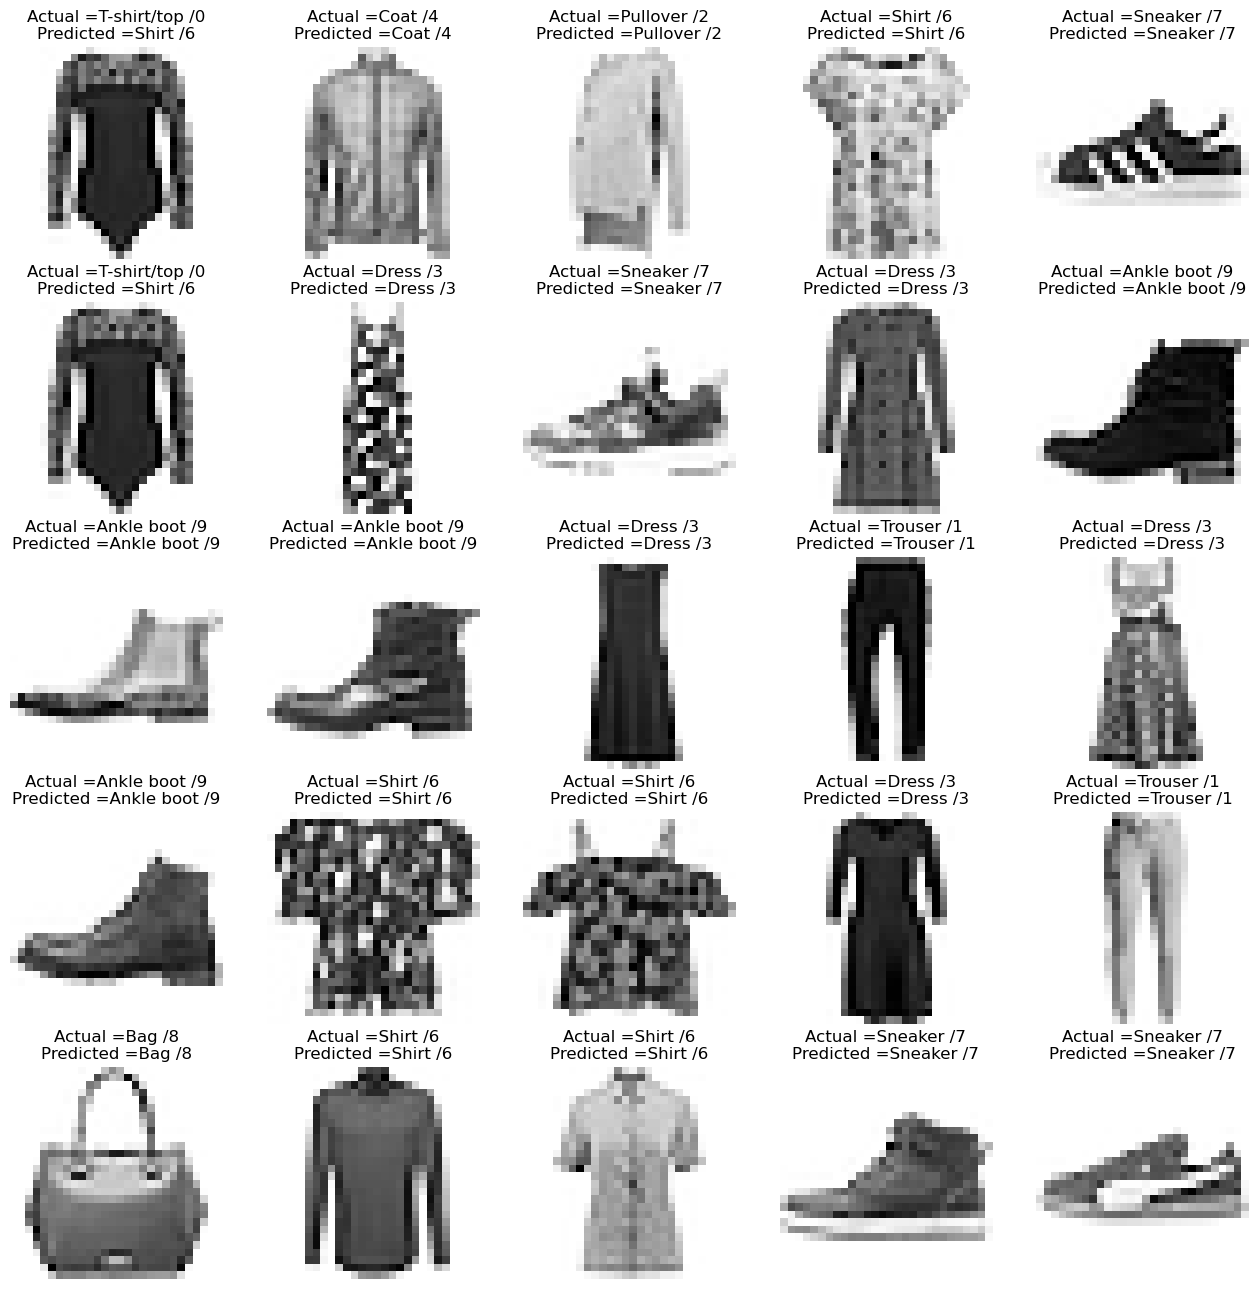

In [30]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
    plt.title('Actual ={} /{}\nPredicted ={} /{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')

In [31]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [33]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label)for label in y_pred]
cm= confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.90      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.90      0.78      0.83      1000
       Dress       0.93      0.87      0.90      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.67      0.70      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



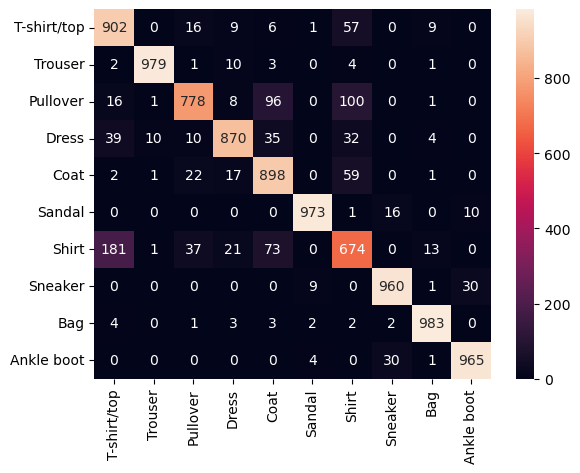

In [34]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [40]:
#Building CNN model
cnn_model2 = keras.models.Sequential([  
                         keras.layers.Conv2D(filters=32,kernel_size=3, strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
                         ])
# compile the model
cnn_model2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#Train the model
cnn_model2.fit(X_train,y_train, epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

cnn_model2.save('fashion_mnist_cnn_model2.h5')
#Building CNN model
cnn_model3= keras.models.Sequential([
                        keras.layers.Conv2D(filters=64,kernel_size=3, strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Conv2D(filters=128, kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.Dropout(0.25),
                        keras.layers.Dense(units=256,activation='relu'),
                        keras.layers.Dropout(0.5),
                        keras.layers.Dense(units=256,activation='relu'),
                        keras.layers.Dropout(0.25),
                        keras.layers.Dense(units=128,activation='relu'),
                        keras.layers.Dropout(0.10),
                        keras.layers.Dense(units=10,activation='softmax')
                        ])
# compile the model
cnn_model3.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#Train the model
cnn_model3.fit(X_train,y_train, epochs=50,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')

cnn_model3.evaluate(X_test,y_test)


Epoch 1/20
94/94 [==============================] - 13s 117ms/step - loss: 1.0328 - accuracy: 0.6091 - val_loss: 0.5855 - val_accuracy: 0.7682
Epoch 2/20
94/94 [==============================] - 10s 112ms/step - loss: 0.5593 - accuracy: 0.7885 - val_loss: 0.4651 - val_accuracy: 0.8263
Epoch 3/20
94/94 [==============================] - 11s 112ms/step - loss: 0.4654 - accuracy: 0.8298 - val_loss: 0.4093 - val_accuracy: 0.8511
Epoch 4/20
94/94 [==============================] - 10s 111ms/step - loss: 0.4122 - accuracy: 0.8486 - val_loss: 0.3698 - val_accuracy: 0.8652
Epoch 5/20
94/94 [==============================] - 10s 112ms/step - loss: 0.3748 - accuracy: 0.8635 - val_loss: 0.3535 - val_accuracy: 0.8686
Epoch 6/20
94/94 [==============================] - 10s 111ms/step - loss: 0.3453 - accuracy: 0.8745 - val_loss: 0.3345 - val_accuracy: 0.8762
Epoch 7/20
94/94 [==============================] - 11s 112ms/step - loss: 0.3263 - accuracy: 0.8799 - val_loss: 0.3206 - val_accuracy: 0.8831

94/94 [==============================] - 20s 211ms/step - loss: 0.0899 - accuracy: 0.9682 - val_loss: 0.3833 - val_accuracy: 0.9079
Epoch 39/50
94/94 [==============================] - 20s 209ms/step - loss: 0.0872 - accuracy: 0.9690 - val_loss: 0.3657 - val_accuracy: 0.9055
Epoch 40/50
94/94 [==============================] - 20s 209ms/step - loss: 0.0745 - accuracy: 0.9730 - val_loss: 0.3787 - val_accuracy: 0.9104
Epoch 41/50
94/94 [==============================] - 20s 210ms/step - loss: 0.0752 - accuracy: 0.9739 - val_loss: 0.4238 - val_accuracy: 0.9048
Epoch 42/50
94/94 [==============================] - 20s 209ms/step - loss: 0.0813 - accuracy: 0.9713 - val_loss: 0.3932 - val_accuracy: 0.9079
Epoch 43/50
94/94 [==============================] - 20s 210ms/step - loss: 0.0776 - accuracy: 0.9722 - val_loss: 0.3766 - val_accuracy: 0.9037
Epoch 44/50
94/94 [==============================] - 20s 208ms/step - loss: 0.0674 - accuracy: 0.9759 - val_loss: 0.3953 - val_accuracy: 0.9082
Epoc

[0.43705224990844727, 0.9070000052452087]